In [12]:
# Example plot of a mask against an image
import os
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt


In [14]:
current_directory = os.getcwd()

imagePath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\images\image_2023-06-21_21-01-00-821663.png"
maskPath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Data\synth\masks\mask_2023-06-21_21-01-00-821663.png"

myImage = Image.open(imagePath)
mask = Image.open(maskPath)
print(mask.size)
# convert the PIL Image into a numpy array
mask = np.array(mask)

# instances are encoded as different colors
obj_ids = np.unique(mask)
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]
num_objs = len(obj_ids)

print(num_objs) 
print(obj_ids)

# Convert the `mask` array to RGB format
rgb_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for i, obj_id in enumerate(obj_ids):
    rgb_mask[mask == obj_id] = np.random.randint(0, 256, size=3)

# Display the image with color tags
plt.imshow(rgb_mask)
plt.axis('off')
plt.show()

(1064, 1064)


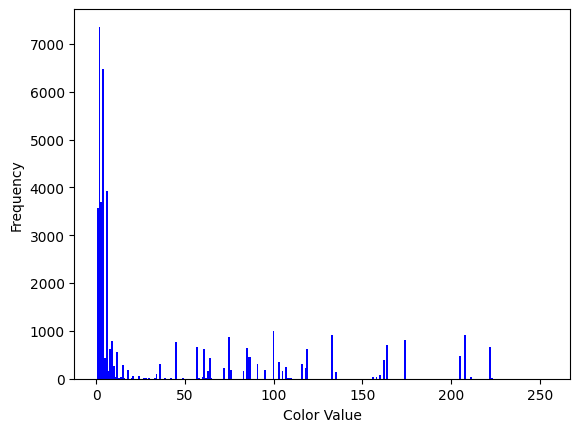

In [16]:
# Show all the colours in a histogram 
colors = mask.flatten()
histogram, bins = np.histogram(colors, bins=np.arange(1, 256))   # ignore background colour
plt.bar(bins[:-1], histogram, width=1, color='blue')
plt.xlabel('Color Value')
plt.ylabel('Frequency')
plt.show()